In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime as dt
import itertools
from sklearn import metrics
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [2]:
x_train = pd.read_csv('XTRAIN2.csv')
x_test = pd.read_csv('XTEST2.csv')
y_train = pd.read_csv('YTRAIN2.csv')
y_test = pd.read_csv('YTEST2.csv')

y_test = y_test.values.ravel()
y_train = y_train.values.ravel()

## **Using Class A Features**


In [3]:
classAFeatures=['HForm', 'AForm', 'HSt', 'ASt', 'HSTKPP', 'ASTKPP', 'HGKPP', 'AGKPP', 'HCKPP', 'ACKPP', 
                'HAttack', 'AAttack', 'HMidField', 'AMidField', 'HDefence', 'ADefence', 'HOverall', 'AOverall', 
                'HTGD', 'ATGD', 'HStWeighted', 'AStWeighted']

x_train_A = x_train[classAFeatures]
x_test_A = x_test[classAFeatures]                

Initial Cross Val Accuracy

In [4]:
rf_clf = RandomForestClassifier(oob_score = True, n_estimators=150)
cv_scores = cross_val_score(rf_clf, x_train_A, y_train, cv = 10)
print('Validation Accuracy: ' + str(cv_scores.mean()))

Validation Accuracy: 0.5166254368860601


Test Accuracy

In [5]:
rf_clf.fit(x_train_A, y_train)
y_predicted = rf_clf.predict(x_test_A)
print ("Test Accuracy: " + str(accuracy_score(y_test, y_predicted)))

Test Accuracy: 0.55


Using GridSearch

In [17]:
parameters = { 'n_estimators' : [50, 100, 150, 200, 250, 300, 350, 400],
               'criterion' : ['gini'],
               'max_features' : ['log2'],
               'max_depth' : [2, 4, 6, 8, 10, 12],
               'min_samples_split' : [2, 5, 10, 15, 100],
               'min_samples_leaf' : [2, 5, 10],
               'class_weight' : ['balanced']
              }
grid_rf = GridSearchCV(rf_clf, parameters, n_jobs = -1, verbose = 2, scoring = 'accuracy')
grid_rf.fit(x_train_A, y_train)

D:\Tools\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 720 candidates, totalling 2160 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    9.0s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   25.6s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   52.9s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed:  7.5min
[Parallel(n_jobs=-1)]: Done 2160 out of 2160 | elapsed:  8.3min finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=10,
                                              max_features='log2',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=2,
                                              min_samples_split=5,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=400, n_jobs=None,
                                              oob_sc...
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,


In [18]:
print('Best Score: ' + str(grid_rf.best_score_))
print('Best Set of Estimators: ' + str(grid_rf.best_estimator_))

Best Score: 0.5189404727997722
Best Set of Estimators: RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=12, max_features='log2',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=2,
                       min_samples_split=5, min_weight_fraction_leaf=0.0,
                       n_estimators=400, n_jobs=None, oob_score=True,
                       random_state=20, verbose=0, warm_start=False)


Using this set of params to tune the model

In [6]:
rf_clf = RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=10, max_features='log2',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=2,
                       min_samples_split=5, min_weight_fraction_leaf=0.0,
                       n_estimators=400, n_jobs=None, oob_score=True,
                       random_state=20, verbose=0, warm_start=False)

rf_clf.fit(x_train_A, y_train)

y_predicted = rf_clf.predict(x_test_A)
print('Test Accuracy: ' + str(accuracy_score(y_test, y_predicted)))

labels=['H','A','D']
confusionMatrix = confusion_matrix(y_test, y_predicted, labels)
print(confusionMatrix)
print(classification_report(y_test, y_predicted, labels))

Test Accuracy: 0.565625
[[217  54  37]
 [ 45 112  17]
 [ 83  42  33]]
              precision    recall  f1-score   support

           H       0.63      0.70      0.66       308
           A       0.54      0.64      0.59       174
           D       0.38      0.21      0.27       158

    accuracy                           0.57       640
   macro avg       0.52      0.52      0.51       640
weighted avg       0.54      0.57      0.55       640



# RPS Value

In [7]:
prob_pred = rf_clf.predict_proba(x_test_A)

def RPS(p, e, r):
    m = dict(zip(np.unique(y_predicted), [0, 1, 2]))
    n = len(p)
    rps = []
    for x in range(n):        
        sum1=0
        
        for i in range(0, r):            
            sum2=0
            obs = [0]*r
            obs[m[e[x]]] = 1
            
            for j in range(0, i):
                sum2 += p[x][j]-obs[j]
                
            sum1 += sum2**2            
        rps.append(sum1/(r-1))
        
    #print(rps)

    print(np.mean(rps))
RPS(prob_pred, y_test, 3)

0.18762211946856938


Graphs

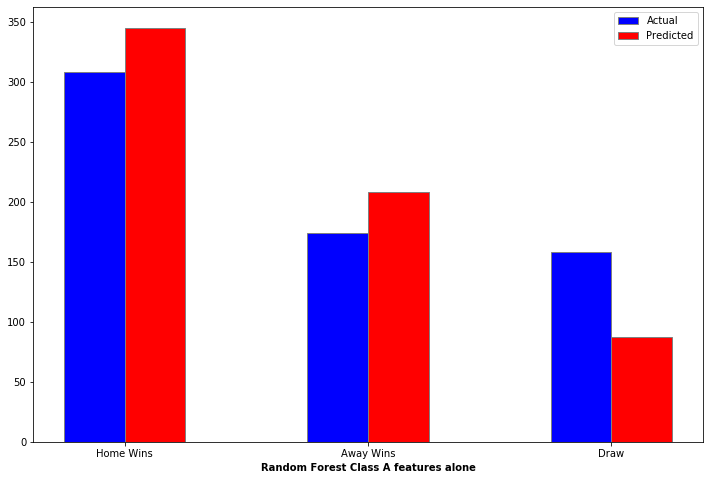

In [8]:
Actual=[]
Home=Away=Draw=0
for i in y_test:
    if(i=='H'):
        Home+=1;
    elif(i=='A'):
        Away+=1;
    else:
        Draw+=1;
Actual.append(Home)
Actual.append(Away)
Actual.append(Draw)

Predicted=[]
PHome=PAway=PDraw=0
for i in y_predicted:
    if(i=='H'):
        PHome+=1;
    elif(i=='A'):
        PAway+=1;
    else:
        PDraw+=1;
Predicted.append(PHome)
Predicted.append(PAway)
Predicted.append(PDraw)

# set width of bar 
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8)) 

# Set position of bar on X axis 
br1 = np.arange(3) 
br2 = [x + barWidth for x in br1] 

# Make the plot 
plt.bar(br1, Actual, color ='b', width = barWidth, 
        edgecolor ='grey', label ='Actual') 
plt.bar(br2, Predicted, color ='r', width = barWidth, 
        edgecolor ='grey', label ='Predicted') 

# Adding Xticks
plt.xlabel('Random Forest Class A features alone', fontweight ='bold') 
plt.ylabel('', fontweight ='bold') 
plt.xticks([r + barWidth/2 for r in range(len(Actual))], 
           ['Home Wins', 'Away Wins', 'Draw']) 
plt.legend(loc="upper right")
plt.show()

## **Using Class B Features**

In [9]:
classBFeatures=['FormDifferential', 'StDifferential', 'STKPP', 'GKPP', 'CKPP', 
                'RelAttack', 'RelMidField', 'RelDefence', 'RelOverall', 
                'GDDifferential', 'StWeightedDifferential']

x_train_B = x_train[classBFeatures]
x_test_B = x_test[classBFeatures]                

Initial Cross Val Accuracy

In [10]:
rf_clf = RandomForestClassifier(oob_score = True, n_estimators=150)
cv_scores = cross_val_score(rf_clf, x_train_B, y_train, cv = 10)
print('Validation Accuracy: ' + str(cv_scores.mean()))

Validation Accuracy: 0.5137869973510909


Test Accuracy

In [11]:
rf_clf.fit(x_train_B, y_train)
y_predicted = rf_clf.predict(x_test_B)
print ("Test Accuracy: " + str(accuracy_score(y_test, y_predicted)))

Test Accuracy: 0.5546875


Using Grid Search

In [43]:
parameters = { 'n_estimators' : [50, 100, 150, 200, 250, 300, 350, 400],
               'criterion' : ['gini'],
               'max_features' : ['log2'],
               'max_depth' : [2, 4, 6, 8, 10, 12],
               'min_samples_split' : [2, 5, 10, 15, 100],
               'min_samples_leaf' : [2, 5, 10],
               'class_weight' : ['balanced']
              }
grid_rf = GridSearchCV(rf_clf, parameters, n_jobs = -1, verbose = 2, scoring = 'accuracy')
grid_rf.fit(x_train_B, y_train)

D:\Tools\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 720 candidates, totalling 2160 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   13.9s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   33.1s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 2160 out of 2160 | elapsed:  5.1min finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=12,
                                              max_features='log2',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=2,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=400, n_jobs=None,
                                              oob_sc...
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,


In [44]:
print('Best Score: ' + str(grid_rf.best_score_))
print('Best Set of Estimators: ' + str(grid_rf.best_estimator_))

Best Score: 0.5152378239817715
Best Set of Estimators: RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=12, max_features='log2',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=2,
                       min_samples_split=5, min_weight_fraction_leaf=0.0,
                       n_estimators=400, n_jobs=None, oob_score=True,
                       random_state=20, verbose=0, warm_start=False)


Uing this set of params to tune the model and Class B Features to train it

In [12]:
rf_clf = RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=12, max_features='log2',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=2,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=400, n_jobs=None, oob_score=True,
                       random_state=20, verbose=0, warm_start=False)

rf_clf.fit(x_train_B, y_train)

y_predicted = rf_clf.predict(x_test_B)
print('Test Accuracy: ' + str(accuracy_score(y_test, y_predicted)))

labels=['H','A','D']
confusionMatrix = confusion_matrix(y_test, y_predicted, labels)
print(confusionMatrix)
print(classification_report(y_test, y_predicted, labels))

Test Accuracy: 0.5609375
[[191  49  68]
 [ 29 112  33]
 [ 57  45  56]]
              precision    recall  f1-score   support

           H       0.69      0.62      0.65       308
           A       0.54      0.64      0.59       174
           D       0.36      0.35      0.36       158

    accuracy                           0.56       640
   macro avg       0.53      0.54      0.53       640
weighted avg       0.57      0.56      0.56       640



# RPS Value

In [13]:
prob_pred = rf_clf.predict_proba(x_test_B)

def RPS(p, e, r):
    m = dict(zip(np.unique(y_predicted), [0, 1, 2]))
    n = len(p)
    rps = []
    for x in range(n):        
        sum1=0
        
        for i in range(0, r):            
            sum2=0
            obs = [0]*r
            obs[m[e[x]]] = 1
            
            for j in range(0, i):
                sum2 += p[x][j]-obs[j]
                
            sum1 += sum2**2            
        rps.append(sum1/(r-1))
        
    #print(rps)

    print(np.mean(rps))
RPS(prob_pred, y_test, 3)

0.18858967265511145


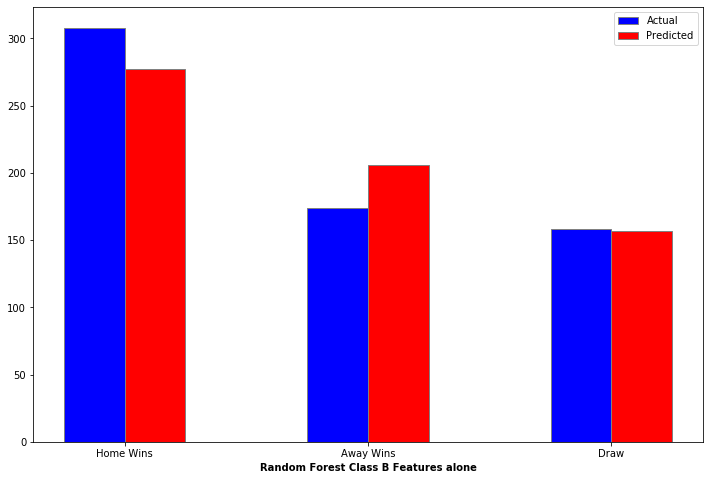

In [14]:
Actual=[]
Home=Away=Draw=0
for i in y_test:
    if(i=='H'):
        Home+=1;
    elif(i=='A'):
        Away+=1;
    else:
        Draw+=1;
Actual.append(Home)
Actual.append(Away)
Actual.append(Draw)

Predicted=[]
PHome=PAway=PDraw=0
for i in y_predicted:
    if(i=='H'):
        PHome+=1;
    elif(i=='A'):
        PAway+=1;
    else:
        PDraw+=1;
Predicted.append(PHome)
Predicted.append(PAway)
Predicted.append(PDraw)

# set width of bar 
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8)) 

# Set position of bar on X axis 
br1 = np.arange(3) 
br2 = [x + barWidth for x in br1] 

# Make the plot 
plt.bar(br1, Actual, color ='b', width = barWidth, 
        edgecolor ='grey', label ='Actual') 
plt.bar(br2, Predicted, color ='r', width = barWidth, 
        edgecolor ='grey', label ='Predicted') 

# Adding Xticks
plt.xlabel('Random Forest Class B Features alone', fontweight ='bold') 
plt.ylabel('', fontweight ='bold') 
plt.xticks([r + barWidth/2 for r in range(len(Actual))], 
           ['Home Wins', 'Away Wins', 'Draw']) 
plt.legend(loc="upper right")
plt.show()